## Portfolio Optimization 

https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html

In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint

#plt.style.use('fivethirtyeight')

### Portfolio Analysis

#### This first part analyze the stocks and portfolio to have a good idea of its behaviour

In [2]:
# Select ETFs of interest
assets =  ["QQQ", "SPY", "DTD", "VNQ", "HYG", "LQD", "BND"]

In [3]:
#Get the stock starting and end date for analysis
stockStartDate = '2012-01-01'
stockEndDate = '2022-07-01'

# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

In [4]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of stock into the data frame
for stock in assets:
        df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']
        
df.tail(10)

,QQQ,SPY,DTD,VNQ,HYG,LQD,BND
Date,,,,,,,
2022-08-15,333.059998,428.859985,62.872208,102.129997,78.800003,114.160004,76.379997
2022-08-16,332.279999,429.700012,63.131599,101.860001,78.430000,113.720001,76.279999
2022-08-17,328.489990,426.649994,62.892162,101.250000,77.620003,112.650002,75.830002
2022-08-18,329.279999,427.890015,63.081715,100.580002,77.739998,112.940002,75.970001
2022-08-19,322.859985,422.140015,62.662704,99.519997,76.949997,111.599998,75.489998
2022-08-22,314.359985,413.350006,61.685001,97.349998,76.080002,110.849998,75.150002
2022-08-23,314.100006,412.350006,61.605186,96.099998,76.269997,110.970001,75.120003
2022-08-24,315.010010,413.670013,61.685001,96.650002,76.360001,110.639999,74.930000
2022-08-25,320.579987,419.510010,62.389999,98.089996,77.080002,111.779999,75.339996


In [5]:
# Assign weights to the stocks. Weights must sum 1
weights = np.array([0.05, 0.20, 0.20, 0.1, 0.15, 0.15, 0.15])
# weights = np.array([0, 0.20, 0, 0, 0.20, 0, 0.6])


print(
      "Stock Weights: ", weights, "\n",
      "Total Weight: ", sum(weights), "\n",
      "Number of Stocks: ", len(weights)
     )

dict([i for i in zip(assets, weights)])

Stock Weights:  [0.05 0.2  0.2  0.1  0.15 0.15 0.15] 
 Total Weight:  1.0 
 Number of Stocks:  7


{'QQQ': 0.05,
 'SPY': 0.2,
 'DTD': 0.2,
 'VNQ': 0.1,
 'HYG': 0.15,
 'LQD': 0.15,
 'BND': 0.15}

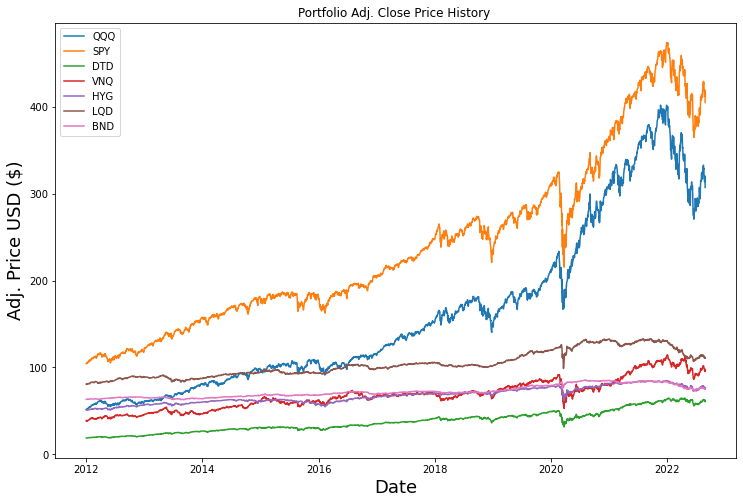

In [6]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History '

#Get the stocks
my_stocks = df

#Create and plot the graph
#width = 12.2in, height = 8
plt.figure(figsize=(12.2, 8)) 

# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
    #plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
    plt.plot(my_stocks[c],  label=c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price USD ($)', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

### Portfolio Descriptive Statistics 

In [7]:
# Calculate the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change().iloc[1:]

**Expected portfolio daily mean return**

In [8]:
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252

####  Expected portfolio variance & volatility

Expected portfolio variance = W' * (Covariance Matrix) * W

Expected portfolio volatility = SQRT (WT * (Covariance Matrix) * W)

In [9]:
cov_matrix_annual = returns.cov() * 252

port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))

port_volatility = np.sqrt(port_variance)

**Summary** 

In [10]:
percent_var = str(round(port_variance, 3) * 100) + '%'
percent_vols = str(round(port_volatility, 3) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 3) * 100) + '%'

print("Expected annual return : " + percent_ret)
print('Annual volatility/standard deviation/risk : ' + percent_vols)
print('Annual variance : ' + percent_var)

Expected annual return : 8.6%
Annual volatility/standard deviation/risk : 10.299999999999999%
Annual variance : 1.0999999999999999%


**Yearly performance**

Calculates portfolio's daily performance and its cumulative annual return

In [11]:
# get returns
returns = df.pct_change().iloc[1:]

# portfolio's daily returns
returns = (returns * weights).sum(axis=1) + 1
returns = returns.reset_index()
returns['year'] = returns.Date.dt.year
returns.drop('Date', axis=1, inplace=True)

returns.columns = ['portfolio', 'year']

In [12]:
# yearly returns
yearly_returns = returns.groupby('year', as_index=False).cumprod().join(returns['year'])
round((yearly_returns.groupby('year').last() - 1) * 100, 2)

,portfolio
year,
2012,11.52
2013,13.60
2014,11.88
2015,0.09
2016,10.36
2017,12.33
2018,-3.32
2019,22.73
2020,10.65


The following code calculates the amount of stocks to buy of each type to create the portfolio

In [13]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# update the prices and set weights
latest_prices = get_latest_prices(df)
weights = dict([i for i in zip(assets, weights)])

# get the discrete allocation based on the investment
da = DiscreteAllocation(weights,
                        latest_prices,
                        total_portfolio_value=50000
                       )

allocation, leftover = da.lp_portfolio()

print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'QQQ': 8, 'SPY': 25, 'DTD': 165, 'VNQ': 52, 'HYG': 99, 'LQD': 67, 'BND': 99}
Funds remaining: $11.77


#### Double check if the sum of the portfolio is lower than the amount available to invest

In [14]:
print('Total allocation:', sum([i * j for i, j in zip(allocation.values(), latest_prices)]).round(2))

Total allocation: 49988.23


### Portfolio Graphic Evaluation

Check visually how it behaves and compare it with S&P500 (Market Index)

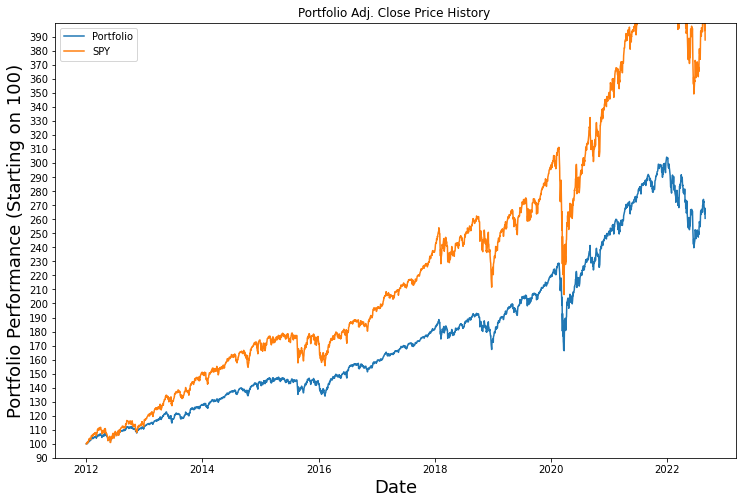

In [15]:
weights_array = []
for i, j in weights.items():
    weights_array.append(j)
    
portfolio = (df * weights_array).sum(axis=1)

# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History '

#Create and plot the graph
#width = 12.2in, height = 8
plt.figure(figsize=(12.2, 8)) 

#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
# plot performance index
plt.plot(portfolio / portfolio[0] * 100)
plt.plot(df['SPY'] / df['SPY'][0] * 100)
    
plt.title(title)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Portfolio Performance (Starting on 100)', fontsize=18)
plt.ylim(90, 400)
plt.yticks(np.arange(90, 400, step=10))

plt.legend(['Portfolio', 'SPY'], loc='upper left')
plt.show()

In [16]:
print('Returns to date:', round(portfolio.iloc[-1] / portfolio.loc['2020-04-24'] - 1 , 3))

Returns to date: 0.296


#### Check its performance: min vs max values, and return since minimum

In [17]:
print(
      round(portfolio.min() / portfolio.max() - 1, 2), "\n",
      round(portfolio.iloc[-1] / portfolio.min() - 1, 2)
     )

-0.67 
 1.61


In [18]:
print(
      round(df['SPY'].min() / df['SPY'].max() -1, 2), "\n",
      round(df['SPY'].iloc[-1] / df['SPY'].min()  - 1, 2)
     )

-0.78 
 2.88


#### Check correlations 

The correlation its important to see if the stocks are different between them. A divese portfolio allows to reduce the variance for a same return

In [19]:
df.columns = assets
assets = df.columns
for stock in assets:
    df[stock] = (df[stock]/df[stock].shift(1) - 1)

In [20]:
df.dropna().corr(method='pearson', min_periods=1).round(2)

,QQQ,SPY,DTD,VNQ,HYG,LQD,BND
QQQ,1.00,0.92,0.81,0.60,0.67,0.18,0.03
SPY,0.92,1.00,0.96,0.74,0.76,0.19,0.02
DTD,0.81,0.96,1.00,0.79,0.75,0.18,0.03
VNQ,0.60,0.74,0.79,1.00,0.67,0.33,0.20
HYG,0.67,0.76,0.75,0.67,1.00,0.42,0.22
LQD,0.18,0.19,0.18,0.33,0.42,1.00,0.84
BND,0.03,0.02,0.03,0.20,0.22,0.84,1.00


### Portfolio using Optimization 

https://pyportfolioopt.readthedocs.io/en/latest/MeanVariance.html#

The following portfolio optimization is used as a reference for calibrating the previous weights. The maximum weight is limited to 15% and seeks to avoid investing all the portfolio in few assets.

Since this portfolio is done using historical information, it can only be used as a statistical reference

In [21]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [22]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of stock into the data frame
for stock in assets:
        df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']
        

mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [23]:
ef = EfficientFrontier(mu, S, #gamma=1,
                       weight_bounds=(0, 0.25)
                      )

# Maximize the Sharpe ratio, and get the raw weights
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 

# Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
 
ef.portfolio_performance(verbose=True)
cleaned_weights

Expected annual return: 11.1%
Annual volatility: 12.5%
Sharpe Ratio: 0.73


OrderedDict([('QQQ', 0.25),
             ('SPY', 0.25),
             ('DTD', 0.19851),
             ('VNQ', 0.0),
             ('HYG', 0.0),
             ('LQD', 0.25),
             ('BND', 0.05149)])

#### Portfolio weights with targeted risk

In [24]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 0.3))

ef.efficient_risk(0.09)

ef.portfolio_performance(verbose=True)
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)

Expected annual return: 8.5%
Annual volatility: 9.0%
Sharpe Ratio: 0.72
OrderedDict([('QQQ', 0.3), ('SPY', 0.00042), ('DTD', 0.14665), ('VNQ', 0.0), ('HYG', 0.0), ('LQD', 0.25293), ('BND', 0.3)])


#### Get the number of stocks to buy according the amount to invest

In [25]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# update the prices and set weights
latest_prices = get_latest_prices(df)
weights = cleaned_weights 

# get the discrete allocation based on the investment
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=50000)

allocation, leftover = da.lp_portfolio()

print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'QQQ': 49, 'DTD': 120, 'LQD': 114, 'BND': 199}
Funds remaining: $11.29
